# Market Price & Planning Assistant for Kenyan Consumers and Farmers

###     Problem Statement

In Kenya, market prices of key food commodities fluctuate unpredictably, often due to seasonal 
changes, weather patterns, middlemen practices, and transport costs. Farmers lack up-to-date and 
reliable information on what prices markets are offering, leaving them vulnerable to exploitation. 
Households and traders are also unable to plan effectively, leading to waste or overspending. 

**Objective 1: Provide Real-Time Market Price Information.**

- Develop a centralized data-driven system that collects, updates, and provides households, 
farmers, and traders with accurate, real-time market price information for key 
commodities.

**Objective 2: Predict Future Price Trends.**

- Implement machine learning models to forecast short- and medium-term price trends, 
enabling users to make informed production, trading, and budgeting decisions. 

**Objective 3: Deliver Insights Through Inclusive and Accessible Channels.**

- Deploy the platform across USSD, web, and web app channels to ensure inclusive access 
and deliver personalized alerts and insights, even in areas with low

### Data Cleaning

### 1. Handling Missing Values.

In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv('merged_commodities.csv')
#display first rows
df.head()

,Commodity,Classification,Market,WholesaleUnitPrice,RetailUnitPrice,Supplyvolume,County,Date
0,Avocado,Fuerte,Kerugoya,50.0,90.0,NaN,Kirinyaga,7/22/2025
1,Avocado,Hass,Voi Retail,NaN,35.0,NaN,Taita-Taveta,7/22/2025
2,Avocado,Fuerte,Chuka,10.0,30.0,NaN,Tharaka-Nithi,7/22/2025
3,Avocado,Local,Voi Wholesale,30.0,NaN,NaN,Taita-Taveta,7/22/2025
4,Avocado,Hass,Kibuye,NaN,150.0,NaN,Kisumu,7/20/2025


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63173 entries, 0 to 63172
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Commodity           63173 non-null  object 
 1   Classification      63173 non-null  object 
 2   Market              63173 non-null  object 
 3   WholesaleUnitPrice  48902 non-null  float64
 4   RetailUnitPrice     59144 non-null  float64
 5   Supplyvolume        0 non-null      float64
 6   County              63153 non-null  object 
 7   Date                63173 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.9+ MB


In [30]:
df.describe()

,WholesaleUnitPrice,RetailUnitPrice,ReferencePrice,Date,Year
count,6.141600e+04,6.141600e+04,6.141600e+04,61429,61429.000000
mean,2.491963e+02,3.759091e+02,3.125527e+02,2024-03-29 08:31:21.430594560,2023.745316
min,1.000000e-02,1.000000e-02,1.000000e-02,2021-05-24 00:00:00,2021.000000
25%,4.000000e+01,5.714000e+01,5.000000e+01,2023-11-11 00:00:00,2023.000000
50%,7.000000e+01,9.000000e+01,8.112500e+01,2024-04-30 00:00:00,2024.000000
75%,1.166667e+02,1.458300e+02,1.300000e+02,2024-08-23 00:00:00,2024.000000
max,2.685700e+06,4.000000e+06,2.685700e+06,2025-07-22 00:00:00,2025.000000
std,1.165412e+04,2.150894e+04,1.522112e+04,NaN,0.800860


### Data Summary

- **Count**  
  - There are 61,416 records for each price type.

- **Mean (Average)**  
  - Average wholesale price: KES 249.20  
  - Average retail price: KES 375.91  
  - Average reference price: KES 315.53  

- **Min (Minimum)**  
  - Lowest wholesale price: KES 0.10  
  - Lowest retail price: KES 0.10  
  - Lowest reference price: KES 0.10  

- **25% (First Quartile)**  
  - 25% of wholesale prices are below KES 40 
  - 25% of retail prices are below KES 57.14  
  - 25% of reference prices are below KES 50  

- **50% (Median)**  
  - Half of wholesale prices are below KES 70  
  - Half of retail prices are below KES 90  
  - Half of reference prices are below KES 81.25  

- **75% (Third Quartile)**  
  - 75% of wholesale prices are below KES 116.67  
  - 75% of retail prices are below KES 145.83  
  - 75% of reference prices are below KES 130  

- **Max (Maximum)**  
  - Highest wholesale price: KES 2,685,700  
  - Highest retail price: KES 4,000,000  
  - Highest reference price: KES 2,685,700  

- **Standard Deviation (Spread)**  
  - Wholesale prices have a spread of KES 11,654.12  
  - Retail prices have a spread of KES 21,508.94  
  - Reference prices have a spread of KES 15,221.12  

- **Date**  
  - Data covers from May 24, 2021, to March 29, 2024.   

- **Year**  
  - Data includes years from 2021 to 2025.  

### Insights

- Retail prices are generally higher than wholesale prices, indicating a profit margin for sellers.
- There's a wide range in prices, especially for wholesale and retail, showing variability in the market.
- The highest prices are significantly higher than the average which might indicate luxury or specialty items.
- The spread (standard deviation) is substantial especially for retail showing a large price difference across different products or locations.

In [3]:
#drop the supply volume as it has no values(empty)
df.drop('Supplyvolume', axis=1,inplace=True)

- Convert the floats to numeric floats ("WholesaleUnitPrice" and "RetailUnitPrice") .

In [4]:
df["WholesaleUnitPrice"] = pd.to_numeric(df["WholesaleUnitPrice"], errors="coerce")
df["RetailUnitPrice"] = pd.to_numeric(df["RetailUnitPrice"], errors="coerce")

In [5]:
# Fill missing wholesale using retail (assuming 20% markup)
df["WholesaleUnitPrice"].fillna(df["RetailUnitPrice"] / 1.2, inplace=True)
df["RetailUnitPrice"].fillna(df["WholesaleUnitPrice"] * 1.2, inplace=True)

### Normalize Price Columns
- Create a single “ReferencePrice” column (average of wholesale & retail) for general analysis.

In [6]:
df["ReferencePrice"] = df[["WholesaleUnitPrice", "RetailUnitPrice"]].mean(axis=1)

###  Standardize Classifications

- Ensure consistent naming (Title).

- If there were typos or mixed cases(we're fixing it).

In [7]:
df["Classification"] = df["Classification"].str.title().str.strip()

### Clean Market and County Names

- Remove extra spaces, fix casing:

In [8]:
df["Market"] = df["Market"].str.title().str.strip()
df["County"] = df["County"].str.title().str.strip()

### Convert Dates

- Make sure Date is a proper datetime.

In [9]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

In [11]:
#create another column for Months extracting it from the date column
df['month_num'] = df['Date'].dt.month

# Extract month name (January, February, etc.)
df['Month_name'] = df['Date'].dt.month_name()

df.drop('month_num', axis=1, inplace=True)

# Extract Year
df['Year'] = df['Date'].dt.year

# Extract Day of Month (date)
df['Day_Name'] = df['Date'].dt.day_name()

### Finalize Columns

- Drop duplicates, re-order, and keep the cleaned schema

In [12]:
df = df.drop_duplicates()
df = df[["Commodity", "Classification", "Market", "WholesaleUnitPrice",
         "RetailUnitPrice", "ReferencePrice", "County", "Date", "Month_name","Year","Day_Name"]]

In [13]:
#view the final cleaned dataset
df.head()

,Commodity,Classification,Market,WholesaleUnitPrice,RetailUnitPrice,ReferencePrice,County,Date,Month_name,Year,Day_Name
0,Avocado,Fuerte,Kerugoya,50.000000,90.0,70.000000,Kirinyaga,2025-07-22,July,2025,Tuesday
1,Avocado,Hass,Voi Retail,29.166667,35.0,32.083333,Taita-Taveta,2025-07-22,July,2025,Tuesday
2,Avocado,Fuerte,Chuka,10.000000,30.0,20.000000,Tharaka-Nithi,2025-07-22,July,2025,Tuesday
3,Avocado,Local,Voi Wholesale,30.000000,36.0,33.000000,Taita-Taveta,2025-07-22,July,2025,Tuesday
4,Avocado,Hass,Kibuye,125.000000,150.0,137.500000,Kisumu,2025-07-20,July,2025,Sunday


In [14]:
df.shape

(61429, 11)

## Exploratory Data Analysis

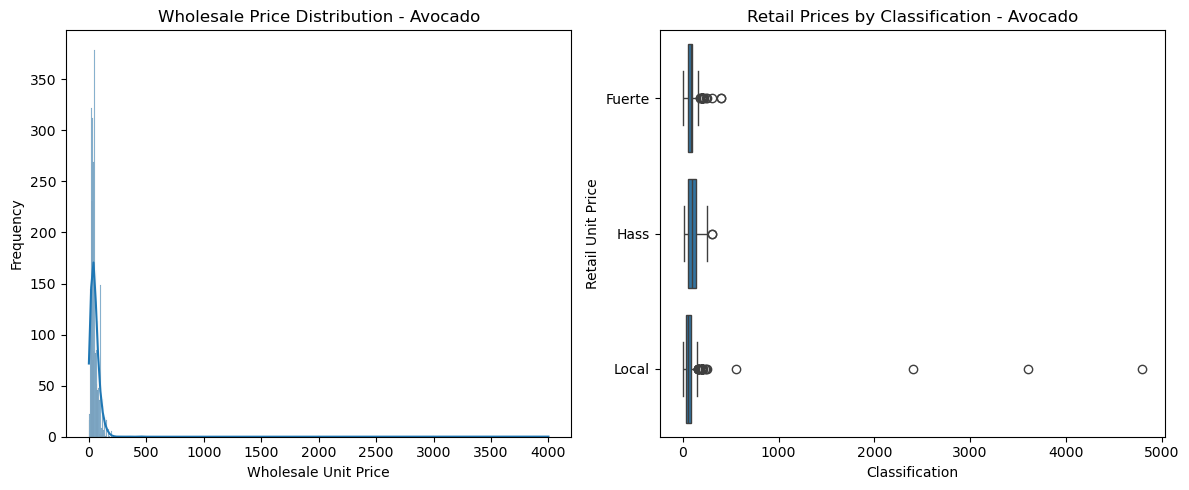

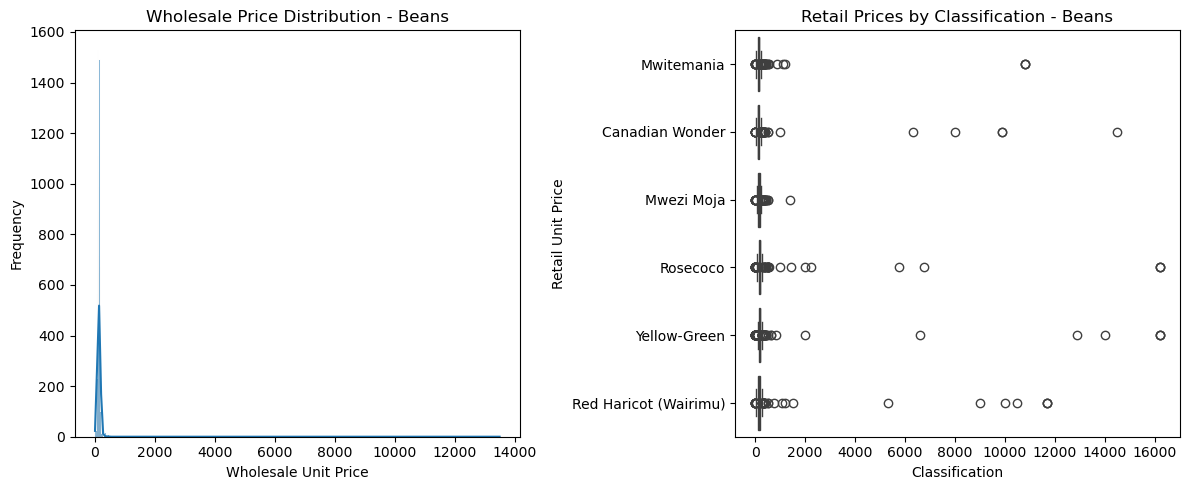

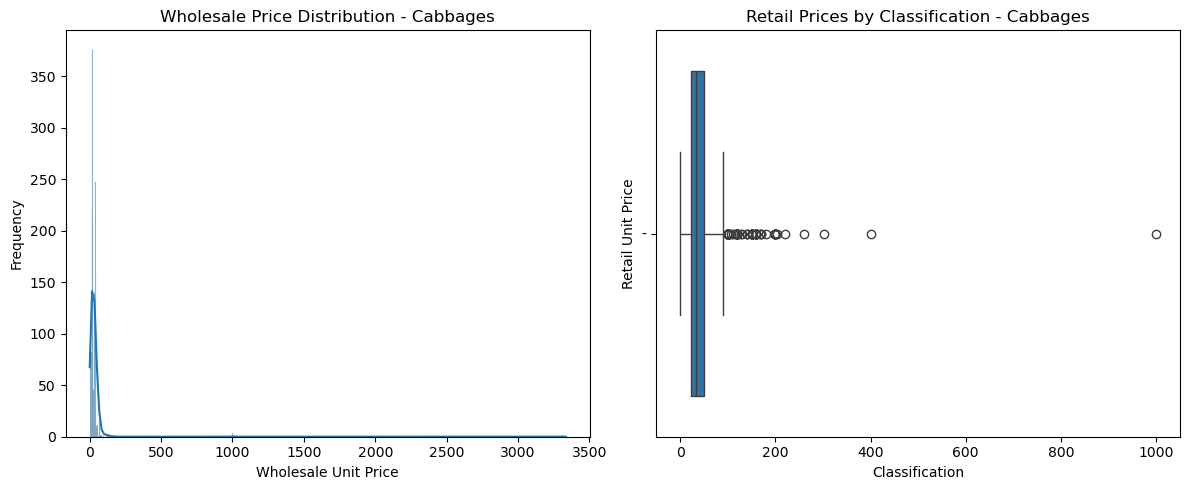

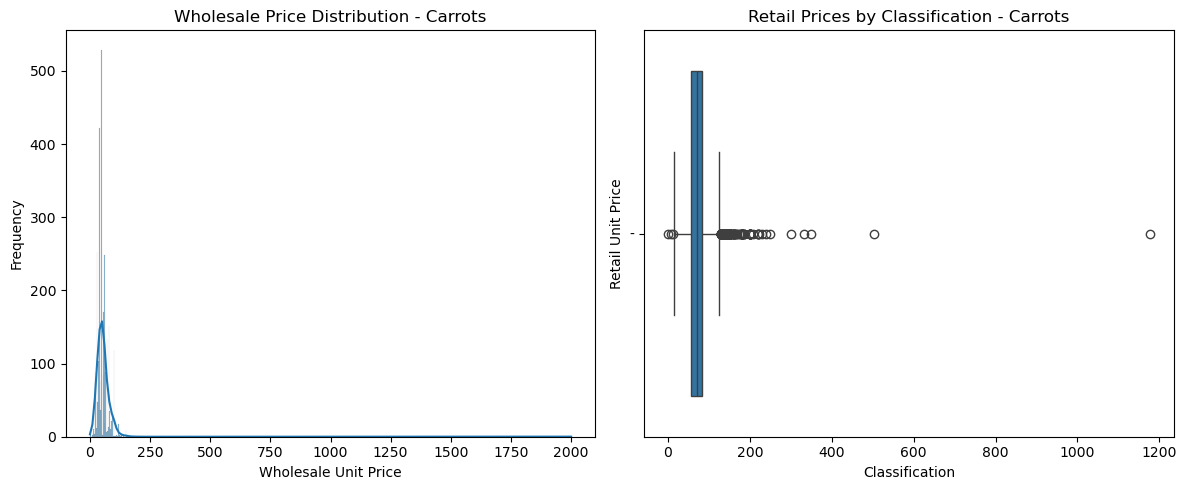

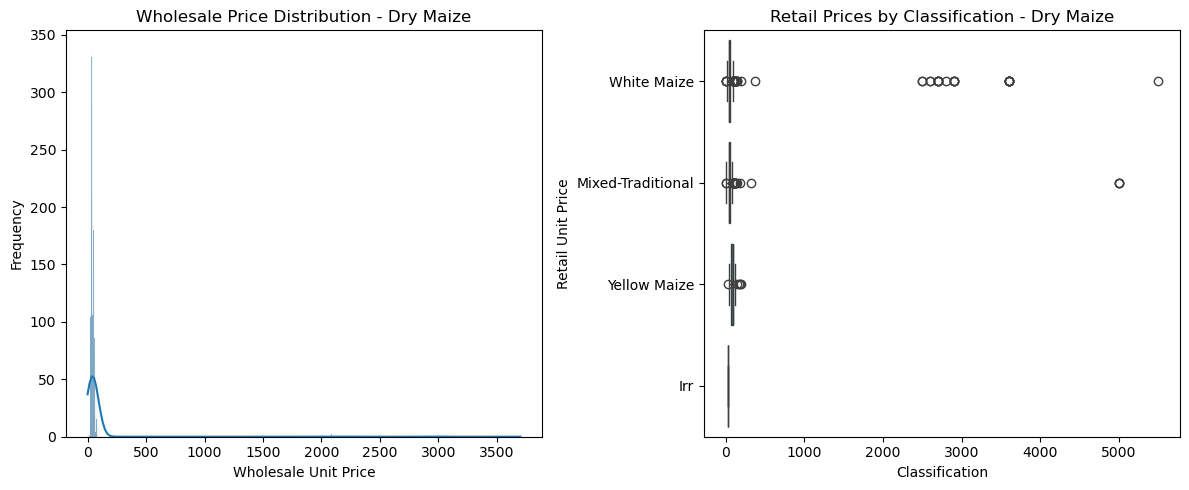

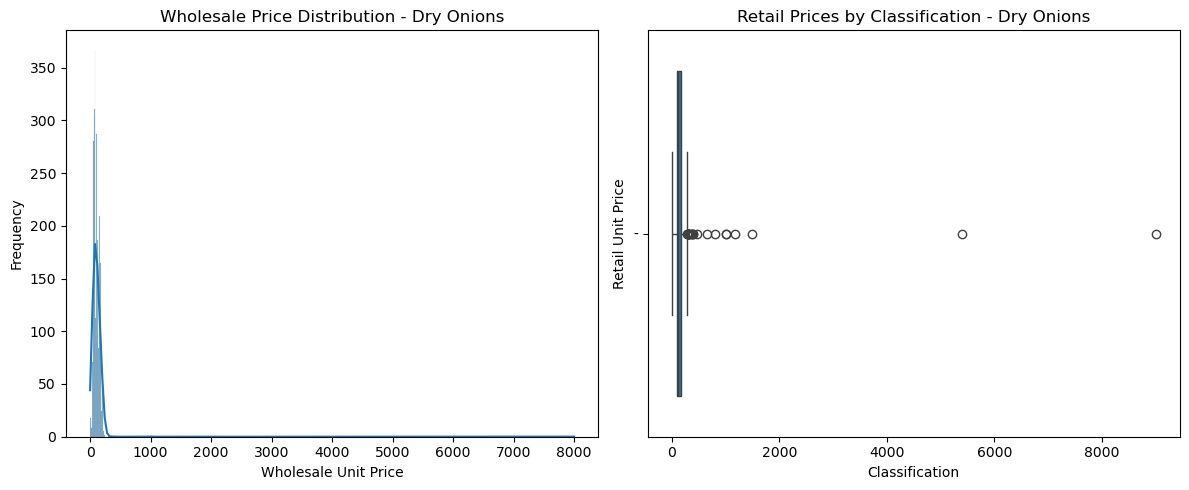

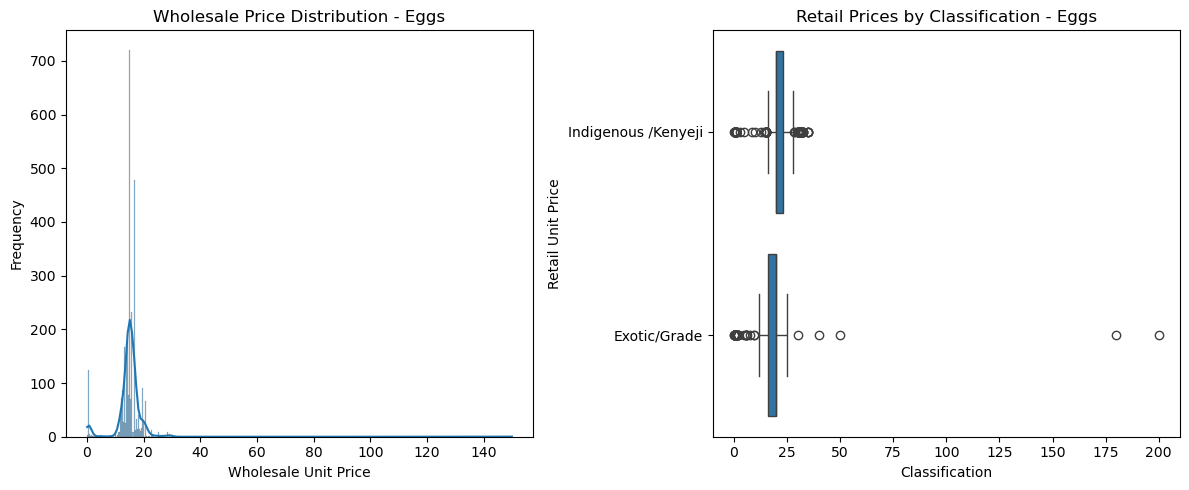

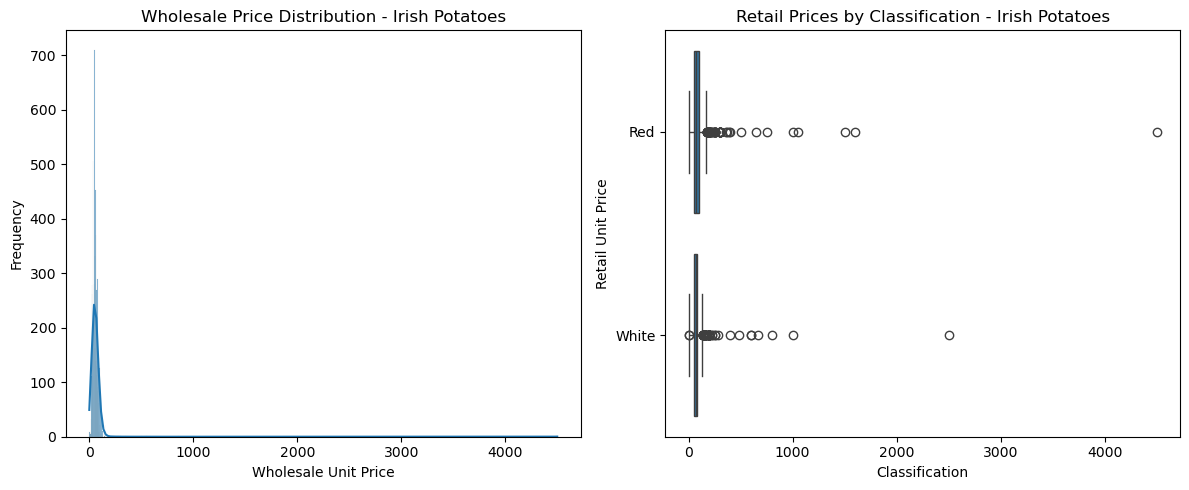

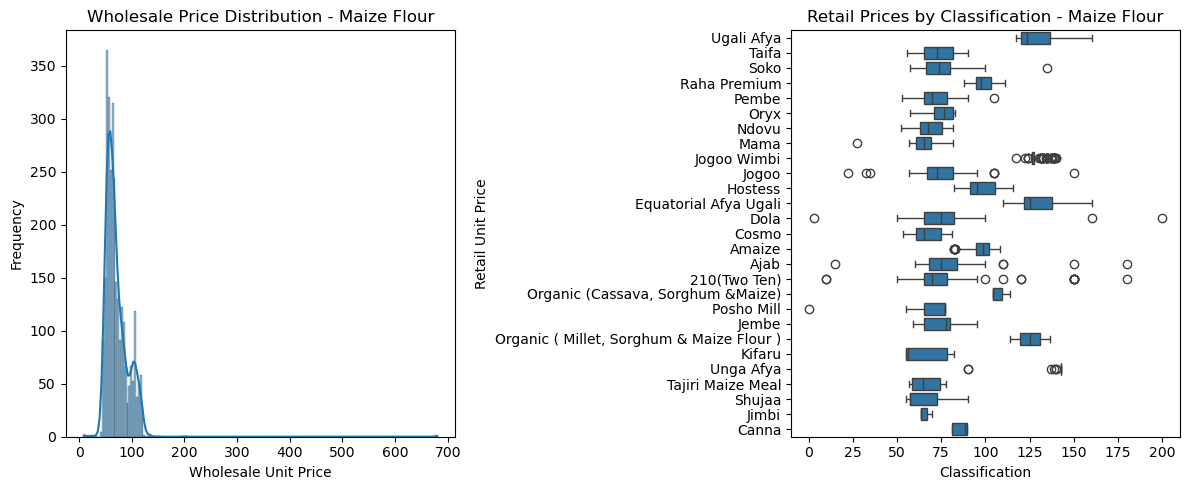

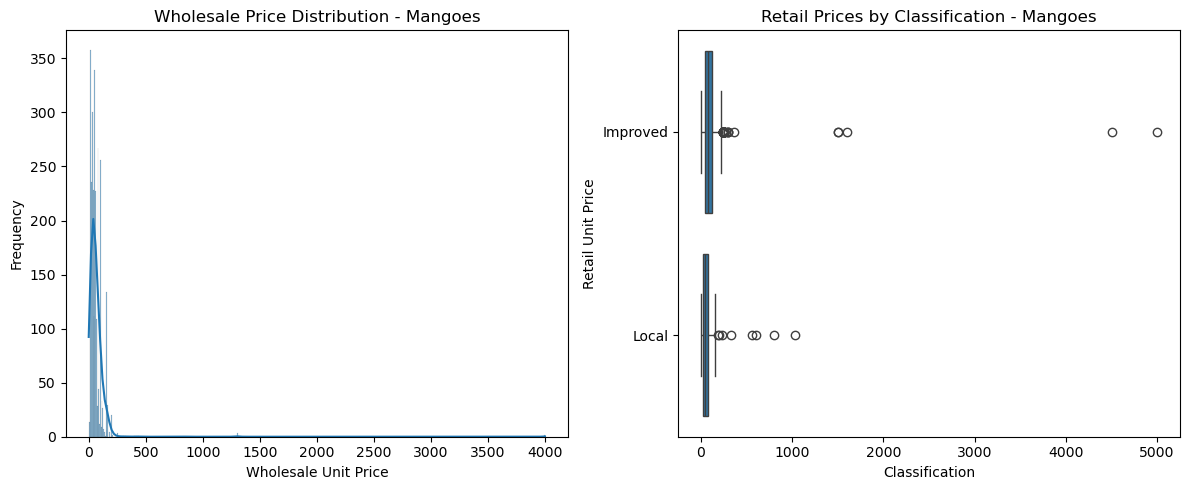

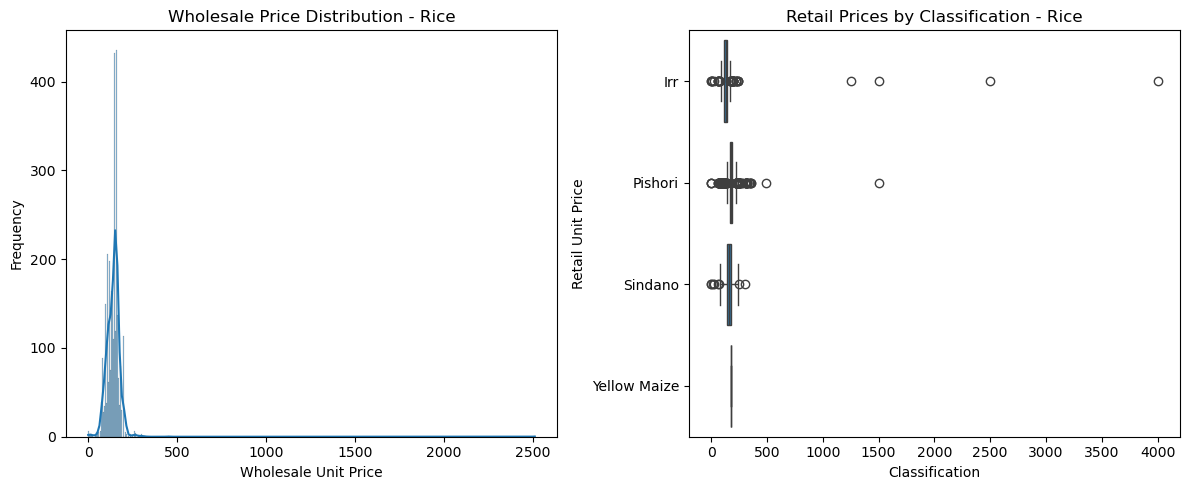

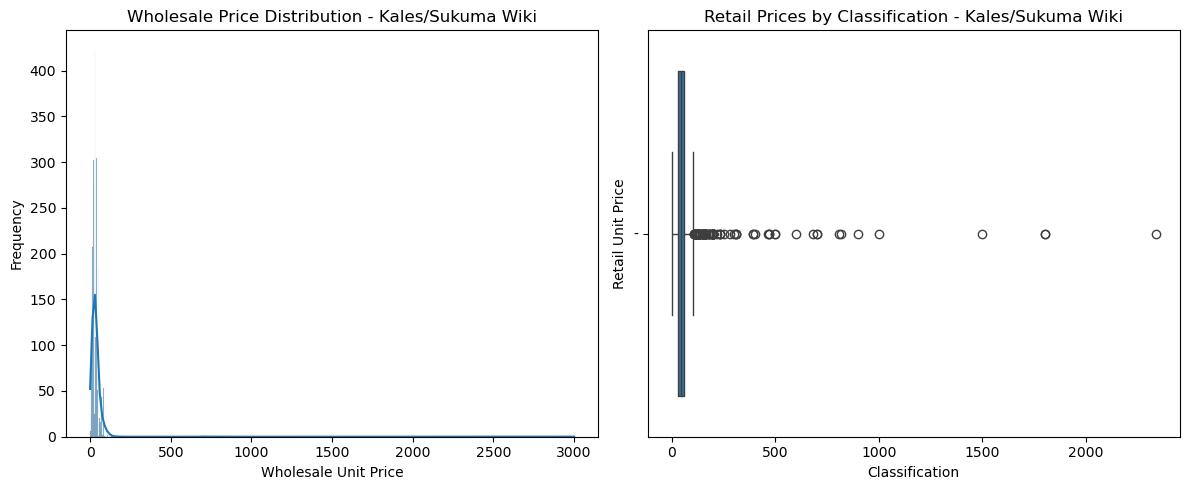

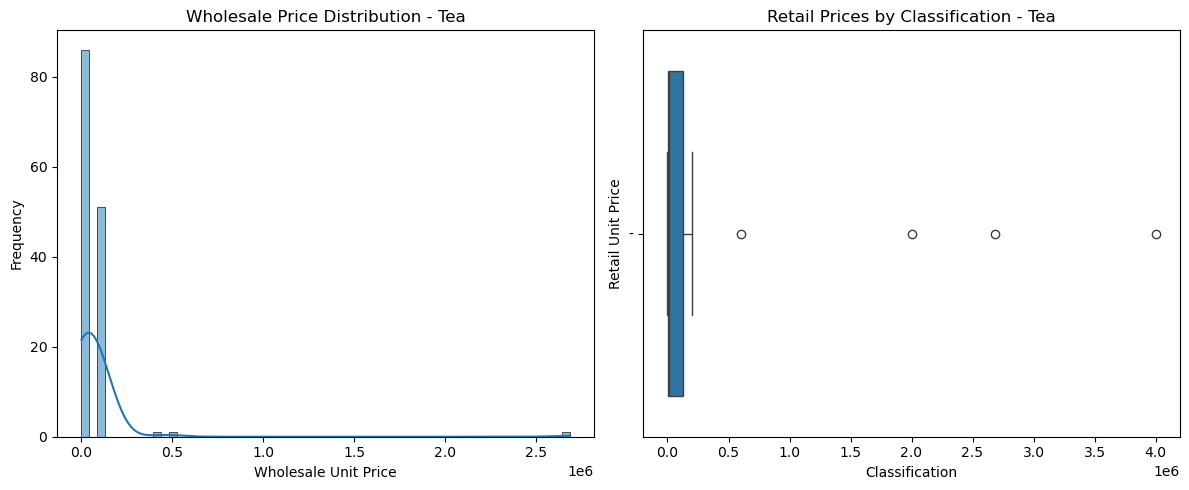

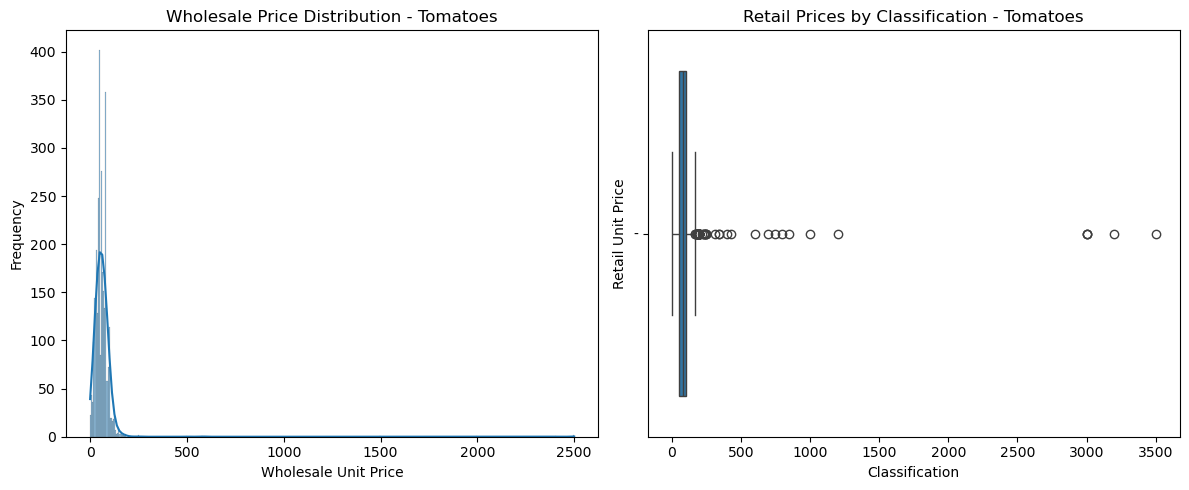

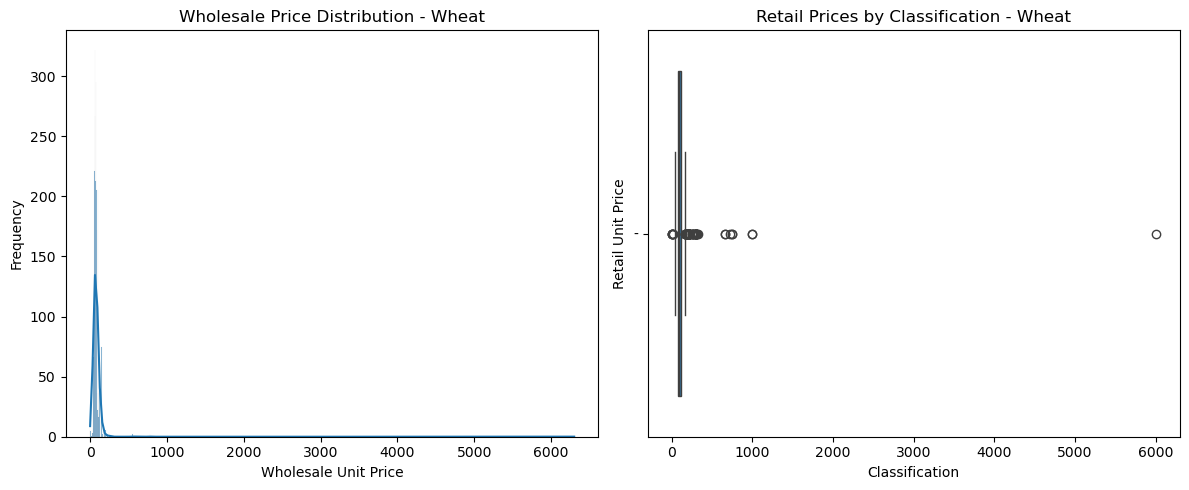

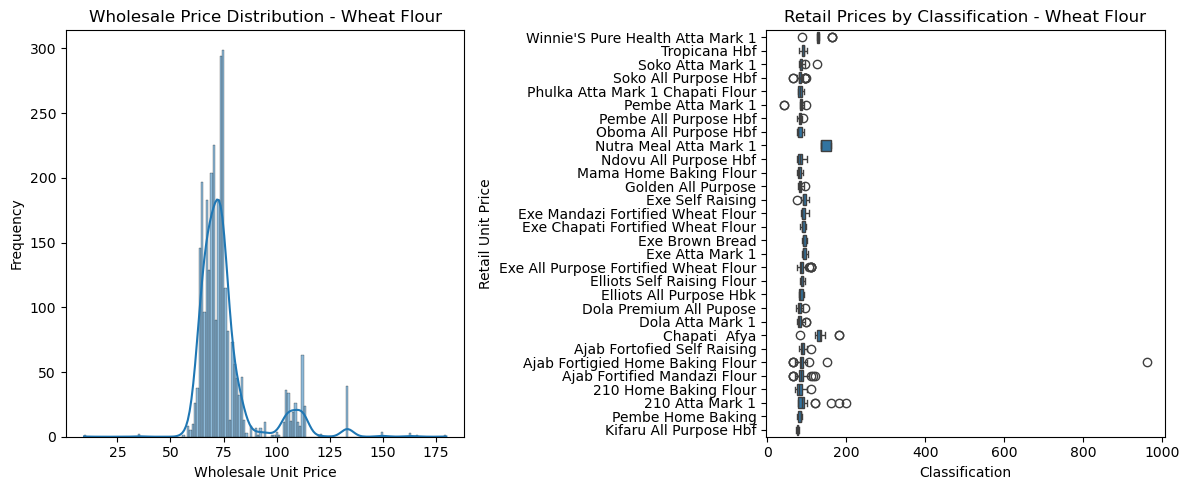

In [15]:
import seaborn as sns
for commodity in df['Commodity'].unique():
    subset = df[df['Commodity'] == commodity]  # Filter for that commodity
    
    # Create side-by-side subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Histogram (Wholesale Prices)
    sns.histplot(subset["WholesaleUnitPrice"], kde=True, ax=axes[0])
    axes[0].set_title(f"Wholesale Price Distribution - {commodity}")
    axes[0].set_xlabel("Wholesale Unit Price")
    axes[0].set_ylabel("Frequency")
    
    # Boxplot (Retail Prices by Classification)
    sns.boxplot(y="Classification", x="RetailUnitPrice", data=subset, ax=axes[1], orient='h')
    axes[1].set_title(f"Retail Prices by Classification - {commodity}")
    axes[1].set_xlabel("Classification")
    axes[1].set_ylabel("Retail Unit Price")
    
    plt.tight_layout()
    plt.show()

### Avocado
**Wholesale Price Distribution** 
- The histogram shows that most wholesale unit prices for Avocados are concentrated at the lower end (near 0–200 KES).

- There are few extreme outliers, with prices going as high as ~4000 KES, but those are rare (long right tail).

- The distribution is highly right-skewed (most data is near the low range, few very high values).

**Retail Prices by Classification**
- The boxplots show retail unit price distributions for different classifications (Fuerte, Hass, Local).

- All three varieties have:

    - Median prices within a similar low-to-mid range, likely between 50–200 KES.

    - Some extreme outliers, especially for Local (prices even above 4000 KES).

- The retail prices show heavy skewness and many outliers, suggesting:

    - Possible reporting errors, 
    - Or rare premium sales/events that are not typical.

**Insights**
- Both wholesale and retail avocado prices are heavily skewed, meaning most sales are cheap, but a few transactions inflate the upper range.

- Retail prices vary by classification but outliers dominate, especially for "Local".

- These outliers could distort averages; median or trimmed means might be better for analysis.

- Could indicate seasonality, reporting inconsistencies, or rare events (bulk sales, premium markets).

### Beans
**Wholesale Price Distribution**
- Most wholesale unit prices are concentrated at the very low end (below ~200 KES).

- The distribution is heavily right-skewed, with prices stretching up to 14,000 KES—these are likely outliers or rare, atypical sales.

- The extreme tail suggests possible:

    - Data entry issues (typos or wrong units),

    - Or special bulk/rare sales inflating the distribution.

**Retail Prices by Classification**
- The boxplots compare retail unit prices for different bean varieties (Mwitemania, Canadian Wonder, Rosecoco, etc.).

- Key observations:

    - Most varieties have retail prices clustered at low values (below 500 KES).

    - There are massive outliers, with some sales hitting 10,000–16,000 KES, far above the usual market range.

    - The median prices are fairly similar across varieties, but outliers dominate the scale, making it hard to see the typical price spread.

**Insights:**
- The data is highly skewed with extreme outliers on both wholesale and retail sides.

- These outliers distort visualization—most prices are small, but the large values push the scale, making the bulk of the data look compressed.

- For proper analysis:

    - Consider removing or capping extreme outliers (Winsorization or IQR filtering).

    - Or use log transformation for visualization so the skew is less extreme.

- The retail price patterns across varieties are generally similar, meaning outliers are likely not specific to one type but systemic.

### Cabbages
**Wholesale Price Distribution**
- Most wholesale prices are heavily concentrated at the low end (under ~100 KES).

- The distribution is right-skewed, with prices reaching up to 3,500 KES, which is highly unusual for cabbages.

- These high-price values are likely:

    - Data entry errors (wrong units or misplaced decimals),

    - Or rare premium/bulk sales.

**Retail Prices by Classification**
- Since there seems to be only one classification, all data is shown in a single boxplot.

- Most retail prices cluster below 100 KES, but there are extreme outliers reaching nearly 1,000 KES.

- The typical range is narrow, but the few large values stretch the plot scale, making the normal data look compressed.

**Insights:**
- Both wholesale and retail cabbage prices are heavily skewed with a few extreme high values.

- These outliers can distort statistical measures (like mean) and visualizations.

- For meaningful analysis:

    - Either remove or cap extreme outliers using IQR filtering or Winsorization,

    - Or use log transformation to visualize without distortion.


### Carrots Wholesale and Retail Prices 

**Observation**

- Wholesale prices are mostly below KES 250 and never go above KES 500.
- Retail prices are scattered from KES 200 all the way up to KES 1,200.
- The biggest gap between retail and wholesale is about KES 1,000.

**Insights**
- Shoppers pay up to 4× more than the farmer’s price.  
- Retailers set very different prices so buyers should compare shops.  
- High retail spread hints at long supply chains or few sellers in some areas.

### Dry Maize Wholesale vs Retail Price

**Observation**
- Wholesale prices stick between KES 50 – 250 
  - White Maize sits at the top (~ 250 KES).  
  - Yellow Maize is cheapest (~ 50 – 100 KES).  
- Retail prices are spread widely from KES 1,000 upto 5,000.  
  - Mixed-Traditional types reach the highest retail tags.

 **Insights**
- Retail is 4× to 20× higher than wholesale as one of the largest mark-ups seen.  
- Yellow Maize offers the lowest entry price for buyers and biggest profit room for sellers.  
- Huge gaps hint at long transport, scarce supply or few traders in some regions.

### Dry Onions Wholesale Vs Retail Price

**Observation**
- Wholesale prices are tightly packed between KES 50 – 350
- Retail prices fan out from KES 2,000 all the way past KES 8,000.
- The widest gap reaches about KES 7,650 (retail 8,000 vs wholesale 50).

 **Insights**
- Buyers pay up to 160× more than the farm-gate price.  
- Extreme mark-up signals long transport routes, storage losses or few sellers in some counties.  
- Wholesale band is narrow so price spikes are not coming from farmers.

### Eggs  Wholesale Vs Retail Price 

**Observation**
- Wholesale prices stay between KES 100 and 700, with two clear groups:
  - Indigenous/Kienyeji eggs sit on the lower end (~100–300).
  - Exotic/Grade eggs cluster higher (~400–700).
- Retail prices spread from KES 25 up to KES 200 per unit.

**Insights**
- Exotic eggs cost about 2–3× more than Indigenous at wholesale and the same gap continues in retail.
- Retail prices overlap a lot so shoppers can find both cheap and expensive eggs in the same market.
- Small wholesale spread but wide retail range suggests sellers set very different profit margins.

### Irish Potatoes Wholesale Vs Retail Price 

**Observations**
- Wholesale prices  
  - Red potatoes: ~200–700 KES  
  - White potatoes: ~100–400 KES  

- Retail prices  
  - Spread from ~1,000 to 4,000 KES for both types  

- Gap  
  - Retail is 3–7× higher than wholesale  

**Insights**
  - Red potatoes start higher at wholesale and stay pricier in shops  
  - Large jump from farm to shelf points to long transport or few middlemen  
  - Buyers of white potatoes can find cheaper deals if they compare markets

### Maize Flour Wholesale Vs Retail Price 

**Observations**

- **Wholesale prices** 
  - Range from ~50 KES (Tajiri Maize Meal, Canna) up to ~350 KES (Ugali Afya, Raha Premium).  
  - Most brands sit between 100–250 KES.  

- **Retail prices**  
  - Spread from ~25 KES to ~200 KES per common unit.  
  - Cheapest retail: Posho Mill, Shujaa, Jimbi.  
  - Costliest retail: Ugali Afya, Raha Premium, Taifa.  

- **Gap**  
  - Mark-up varies as some low-cost brands double in price while premium brands add only ~25–50 KES.  

- **Insights**  
  - Budget brands (Posho Mill, Shujaa) start cheap but still double at retail.  
  - Premium brands (Ugali Afya, Raha) already cost more wholesale and stay high in shops.  
  - Large brand count keeps retail prices competitive—shoppers can save by switching brands.

### Mangoes Wholesale Vs Retail Price

- **Wholesale prices**  
  - Local varieties: ~50 – 150 KES  
  - Improved varieties: ~200 – 350 KES  

- **Retail prices**  
  - Local: ~1,000 – 4,000 KES  
  - Improved: ~2,000 – 5,000 KES  

- **Gap**  
  - Retail is 8 – 15× higher than wholesale  

- **Insights**  
  - Improved mangoes start higher and stay pricier on the shelf. 
  - Huge mark-up suggests long transport, spoilage risk or few sellers  
  - Buyers can find big savings by choosing local varieties when in season

### Rice Wholesale Vs Retail Price 

- **Wholesale prices**  
  - Pishori: ~100–400 KES  
  - Sindano: ~100–300 KES  
  - Yellow Maize likely a data entry error as it  should be another rice type.  

- **Retail prices**  
  - Spread from ~500 KES to ~4,000 KES  

- **Gap**  
  - Retail is 5 – 15× higher than wholesale  

- **Insights**  
  - Pishori has the highest wholesale price but also the widest retail range.  
  - Sindano is mid-range at wholesale but can hit high retail prices.  
  - Big mark-up shows rice is sensitive to transport costs or has few sellers in some areas.  
  - Shoppers can save by comparing brands; sellers can profit by targeting high-end markets with Pishori.

### Kales/Sukuma Wiki Wholesale Vs Retail Price 

- **Wholesale prices**  
  - Most prices are between 0 and 500 KES.  
  - Very few prices above 500 KES.

- **Retail prices**  
  - Range from about 0 to 2,000 KES.  
  - Most prices are between 0 and 500 KES.

- **Gap**  
  - Retail prices are generally higher than wholesale prices.  
  - Some retail prices are significantly higher, up to 4 times the wholesale price.

- **Insights**  
  - The majority of both wholesale and retail transactions happen at lower price points.  
  - There's potential for sellers to increase prices as some are already doing.  
  - Buyers might be able to find good deals by shopping around, as prices vary widely.

### Tea Wholesale Vs Retail Price 

- **Wholesale prices**  
  - Most prices are between 0 and 50 KES.  
  - A few prices are above 50 KES.

- **Retail prices**  
  - Range from about 0 to 400 KES.  
  - Most prices are below 200 KES.

- **Gap**  
  - Retail prices are generally higher than wholesale prices.  
  - Some retail prices are significantly higher up to 4 times the wholesale price.

- **Insights**  
  - The majority of both wholesale and retail transactions happen at lower price points.  
  - There's a wide range in retail prices indicating different types or qualities of tea.  
  - Buyers have options as they can choose cheaper tea or pay more for premium varieties.

### Tomatoes Wholesale Vs Retail Price 

- **Wholesale prices**  
  - Most prices are between 0 and 500 KES.  
  - A few prices are above 500 KES.

- **Retail prices**  
  - Range from about 0 to 3,500 KES.  
  - Most prices are below 500 KES.

- **Gap**  
  - Retail prices are generally higher than wholesale prices.  
  - Some retail prices are significantly higher up to 7 times the wholesale price.

- **Insights**  
  - The majority of both wholesale and retail transactions happen at lower price points.  
  - There's a wide range in retail prices indicating different types or qualities of tomatoes.  
  - Buyers have options as they can choose cheaper tomatoes or pay more for premium varieties.

### Wheat Wholesale Vs Retail Price 

- **Wholesale prices**  
  - Most prices are between 0 and 1,000 KES.  
  - A few prices are above 1,000 KES.

- **Retail prices**  
  - Range from about 0 to 6,000 KES.  
  - Most prices are below 2,000 KES.

- **Gap**  
  - Retail prices are generally higher than wholesale prices.  
  - Some retail prices are significantly higher up to 6 times the wholesale price.

- **Insights**  
  - The majority of both wholesale and retail transactions happen at lower price points.  
  - There's a wide range in retail prices indicating different types or qualities of wheat.  
  - Buyers have options as they can choose cheaper wheat or pay more for premium varieties.

### Wheat Flour Wholesale Vs Retail Price 

- **Wholesale prices**  
  - Most prices are between 25 and 100 KES.  
  - A few prices are above 100 KES.

- **Retail prices**  
  - Range from about 0 to 1,000 KES.  
  - Most prices are below 200 KES.

- **Gap**  
  - Retail prices are generally higher than wholesale prices.  
  - Some retail prices are significantly higher up to 10 times the wholesale price.

- **Insights**  
  - The majority of both wholesale and retail transactions happen at lower price points.  
  - There's a wide range in retail prices indicating different types or qualities of wheat flour.  
  - Buyers have options as they can choose cheaper wheat flour or pay more for premium varieties.  
  - The large number of brands suggests a competitive market with many choices for consumers.

### Remove outliers in the prices.

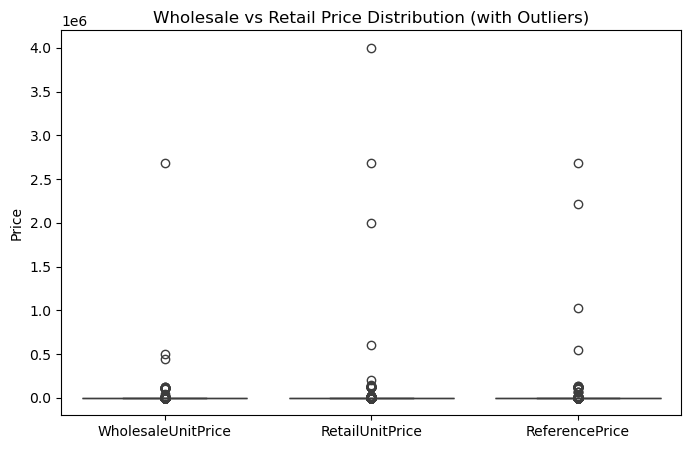

In [34]:
def plot_price_boxplots(df):
    price_cols = ["WholesaleUnitPrice", "RetailUnitPrice","ReferencePrice"]
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df[price_cols])
    plt.title("Wholesale vs Retail Price Distribution (with Outliers)")
    plt.ylabel("Price")
    plt.show()

# Usage
plot_price_boxplots(df)

### Boxplot Observations

- **Wholesale Unit Price**  
  - Most prices are concentrated very low close to 0 KES.  
  - There are a few outliers with prices reaching up to 2.5million KES.

- **Retail Unit Price**  
  - Similar to wholesale most prices are close to 0 KES.  
  - Outliers are present with the highest reaching nearly 4milllion KES.

- **Reference Price**  
  - The distribution is comparable to wholesale and retail with most prices near 0 KES.  
  - Outliers are also evident with some prices around 2.5 million KES.

### Insights

- The presence of outliers indicates that while most transactions occur at low prices there are occasional high-value transactions.
- The similarity in the distribution of prices across wholesale, retail, and reference suggests a consistent pricing strategy or market condition affecting all three.
- The concentration of most prices near 0 KES might indicate data entry errors or a specific market segment where prices are exceptionally low.


In [16]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns = ["WholesaleUnitPrice", "RetailUnitPrice", "ReferencePrice"]
df_clean = remove_outliers(df, columns)

In [18]:
print(df.shape)

print(df_clean.shape)

(61429, 11)
(60773, 11)


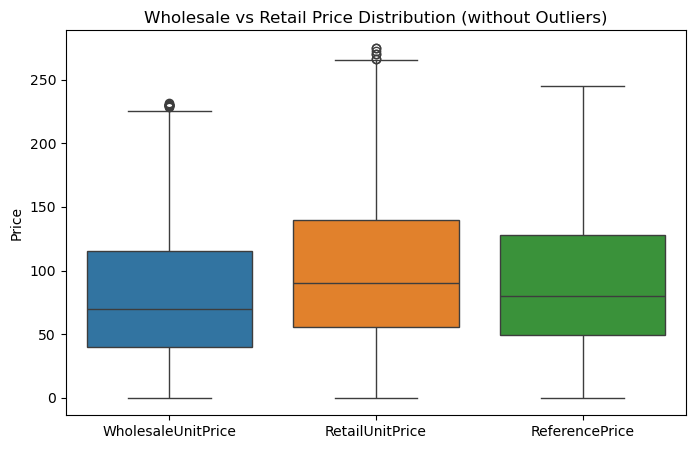

In [33]:
def plot_price_boxplots(df_clean):
    price_cols = ["WholesaleUnitPrice", "RetailUnitPrice","ReferencePrice"]
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_clean[price_cols])
    plt.title("Wholesale vs Retail Price Distribution (without Outliers)")
    plt.ylabel("Price")
    plt.show()

# Usage
plot_price_boxplots(df_clean)

### Boxplot Observations Without Outliers

- **Wholesale Unit Price**  
  - Most prices fall between 50 and 100 KES.  
  - A few prices are slightly above 200 KES.

- **Retail Unit Price**  
  - Prices are generally higher than wholesale mostly between 100 and 150 KES.  
  - Some prices reach up to 250 KES.

- **Reference Price**  
  - Prices are similar to wholesale, mostly between 50 and 100 KES.  
  - A few prices extend up to around 200 KES.

### Insights

- Retail prices are consistently higher than both wholesale and reference prices indicating a markup.
- The spread of prices is narrower without outliers suggesting more consistent pricing within the main data set.
- Reference prices are close to wholesale which might indicate it is used as a benchmark or average.
- The presence of outliers in the original data suggests there are occasional transactions at much higher prices which could be due to special circumstances or premium products.

### Time Series plot of Prices by Month.

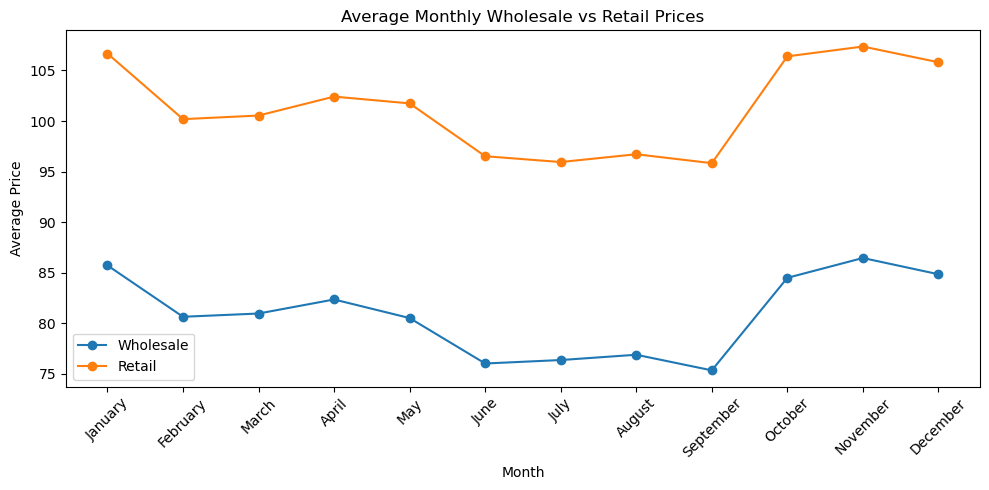

In [20]:
# Define month order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Make Month_name an ordered categorical type
df_clean["Month_name"] = pd.Categorical(df_clean["Month_name"], 
                                        categories=month_order, 
                                        ordered=True)

# Group by and compute mean
monthly_prices = df_clean.groupby("Month_name")[["WholesaleUnitPrice", "RetailUnitPrice"]].mean()

# Now it will be sorted correctly
monthly_prices = monthly_prices.sort_index()

# Plot
plt.figure(figsize=(10,5))
plt.plot(monthly_prices.index.astype(str), monthly_prices["WholesaleUnitPrice"], label="Wholesale", marker='o')
plt.plot(monthly_prices.index.astype(str), monthly_prices["RetailUnitPrice"], label="Retail", marker='o')

plt.title("Average Monthly Wholesale vs Retail Prices")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



###  Observations & Insights

**Observations**

-  Retail prices are consistently higher than wholesale prices throughout the year due to added costs like transport, storage and profit margins.

-  Fluctuation Patterns:
   - Retail prices remain relatively stable.
   - Wholesale prices show greater volatility with sharper dips and rises.

-  Monthly Trends:
   - January - High prices for both categories possibly due to post-holiday demand.
   - June to September - There's  noticeable dip in wholesale prices with lowest in September likely due to harvest season.
   - October to November -  Sharp price increase especially retail could be driven by pre-holiday demand or reduced supply.
   - December -  Prices stabilize, retail slightly dips.

-  Retail-Wholesale Price Gaps:   
   - The gap widens in October – November indicating increased retailer margins during peak demand months.

**Insights for Decision Making**
       
   - Buy in bulk around August–September for cost-saving.
   - Monitor price gaps for adjusting retail margins.
   - Seasonal planning is crucial for procurement, pricing and inventory management.


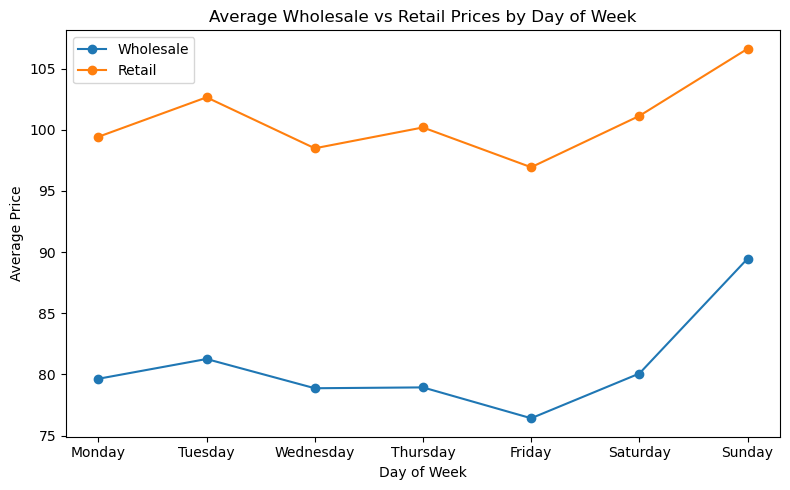

In [21]:
# Aggregate average prices by day of the week
day_prices = df_clean.groupby("Day_Name")[["WholesaleUnitPrice", "RetailUnitPrice"]].mean()

# Ensure correct order of days
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_prices = day_prices.reindex(order)

# Plot
plt.figure(figsize=(8,5))
plt.plot(day_prices.index, day_prices["WholesaleUnitPrice"], label="Wholesale", marker='o')
plt.plot(day_prices.index, day_prices["RetailUnitPrice"], label="Retail", marker='o')

plt.title("Average Wholesale vs Retail Prices by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Price")
plt.legend()
plt.tight_layout()
plt.show()

### Observation & Insights

**Observation**
* Retail prices are consistently higher than wholesale prices throughout the week.
* Both price types experience fluctuations with noticeable peaks on Sunday and Tuesday

**Insights**

* Sunday records the highest prices in both categories, suggesting increased demand or reduced supply before the new week begins.
* Friday shows the lowest wholesale prices, which may indicate a market clearing behavior before the weekend.
* The retail price curve is smoother than the wholesale one indicating more stable retail pricing, possibly due to margin buffers.


### Heat map correlation between WholeSaleUnitPrice and RetailUnitPrice

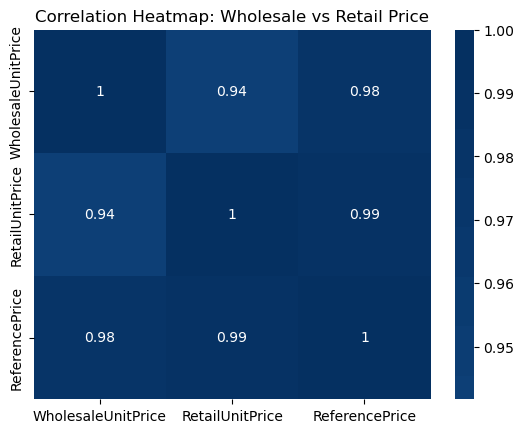

In [27]:
# Correlation matrix
corr = df_clean[["WholesaleUnitPrice", "RetailUnitPrice",'ReferencePrice']].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap="RdBu",alpha= 1.0, center=0)

plt.title("Correlation Heatmap: Wholesale vs Retail Price")
plt.show()

Correlation Heatmap Analysis

#### Observations

* There is a strong positive correlation between RetailUnitPrice and WholesaleUnitPrice (correlation ≈ 0.90+). This indicates that as wholesale prices increase, retail prices tend to rise as well  a logical and expected market behavior.
  
* RetailUnitPrice also shows a moderate to strong correlation with ReferencePrice suggesting alignment or benchmarking to a standard pricing value.

  
* WholesaleUnitPrice and ReferencePrice are similarly positively correlated, though slightly less strongly than Retail & Wholesale.

####  Insights

* These correlations confirm the interconnected pricing structure in the supply chain — particularly that retail pricing decisions are influenced by upstream wholesale costs.
  
* The strong linear relationships justify using RetailUnitPrice or WholesaleUnitPrice as input variables in  predictive models (e.g regression or forecasting).
  
* ReferencePrice can serve as a baseline or control variable for price validation, quality checks, or deviation analysis.



### Scatter plot of Wholesale Vs Retail prices by Commodities.

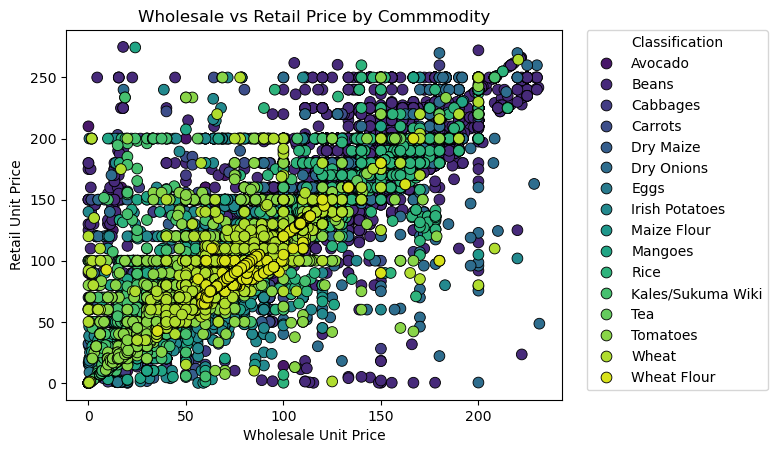

In [23]:
sns.scatterplot(
    x="WholesaleUnitPrice",
    y="RetailUnitPrice",
    hue="Commodity",
    data=df_clean,
    palette="viridis",   # Change colormap here
    s=60,                # Adjust point size
    edgecolor="black"    # Optional, makes points stand out
)

plt.title("Wholesale vs Retail Price by Commmodity")
plt.xlabel("Wholesale Unit Price")
plt.ylabel("Retail Unit Price")
plt.legend(title="Classification", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

### Observation 

- Every item costs more in shops than in wholesale.  
- Avocado has the biggest price jump.  
- Tea and kales have the smallest jump.  
- Most prices go up by half or even double.  

### Insights  
- Shops add a big mark-up to everything.  
- Items that go bad quickly need the biggest mark-up.  
- Turning raw grain into flour adds quick profit.  
- Cheap items like tea can’t take big mark-ups.

### Price Distributions across Counties.

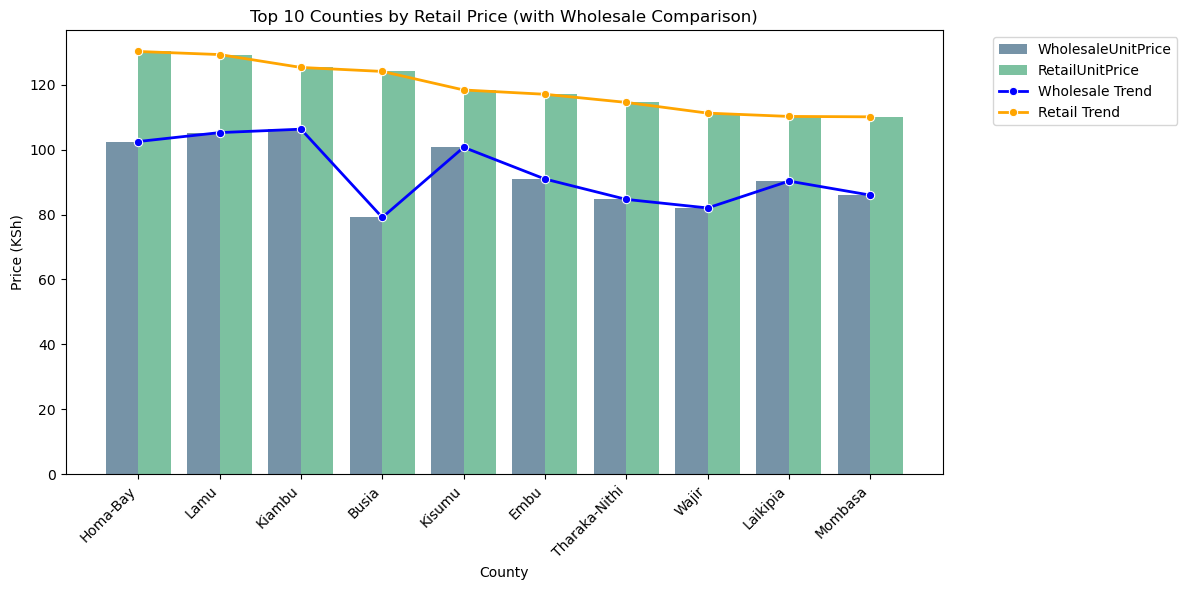

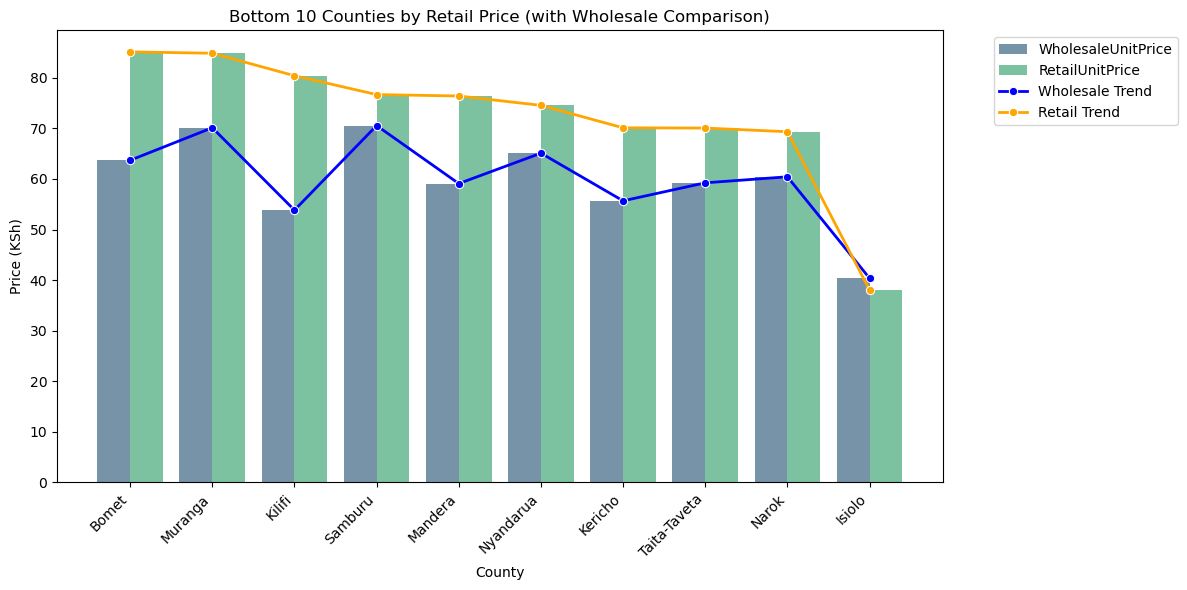

In [24]:
#calculate average prices per county
county_prices = df_clean.groupby("County")[["WholesaleUnitPrice", "RetailUnitPrice"]].mean().reset_index()

# Sort by RetailUnitPrice
sorted_prices = county_prices.sort_values("RetailUnitPrice", ascending=False)

# Get Top 10 and Bottom 10
top10 = sorted_prices.head(10)
bottom10 = sorted_prices.tail(10)

def plot_county_prices(data, title):
    # Melt for grouped bars
    melted = data.melt(
        id_vars="County",
        value_vars=["WholesaleUnitPrice", "RetailUnitPrice"],
        var_name="PriceType", value_name="Price"
    )

    plt.figure(figsize=(12, 6))
    
    # Barplot
    sns.barplot(x="County", y="Price", hue="PriceType", 
                data=melted, palette="viridis", alpha=0.7)
    
    # Line overlays
    sns.lineplot(x="County", y="WholesaleUnitPrice", data=data, 
                 label="Wholesale Trend", color="blue", marker="o", linewidth=2)
    sns.lineplot(x="County", y="RetailUnitPrice", data=data, 
                 label="Retail Trend", color="orange", marker="o", linewidth=2)
    
    plt.title(title)
    plt.xlabel("County")
    plt.ylabel("Price (KSh)")
    plt.xticks(rotation=45, ha="right")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# Plot Top 10
plot_county_prices(top10, "Top 10 Counties by Retail Price (with Wholesale Comparison)")

# Plot Bottom 10
plot_county_prices(bottom10, "Bottom 10 Counties by Retail Price (with Wholesale Comparison)")

### Top 10 Counties by Retail Price (with Wholesale Comparison)

**Observations**

- Retail price is higher than wholesale in every county.
- Homabay has the highest retail price (about 100 KES).
- Mombasa has the lowest retail price (about 35 KES).
- Wholesale prices stay almost the same across counties.


**Insights**

- Shoppers in Homabay  pay almost three times more than those in Mombasa.
- Goods cost about the same to bring in so big price jumps come from transport or few sellers.
- Mombasa is cheapest for buyers but gives sellers the smallest profit.



### Bottom 10 Counties by Retail Price (with Wholesale Comparison)

**Observations**

- Retail prices are just a little higher than wholesale price
- Highest retail price is about 90 KES in Bomet county
- Lowest retail price is about 30 KES in Isiolo county
- Wholesale prices stay close to retail so the gap is small.
  
**Insights**

- Small mark-up means shoppers here pay almost the same as the wholesale price.
- Sellers earn very little profit so they may struggle to cover costs.
- Good for buyers as prices are the cheapest in the country.
- Risk for sellers if wholesale price rises even a little as they may lose money.

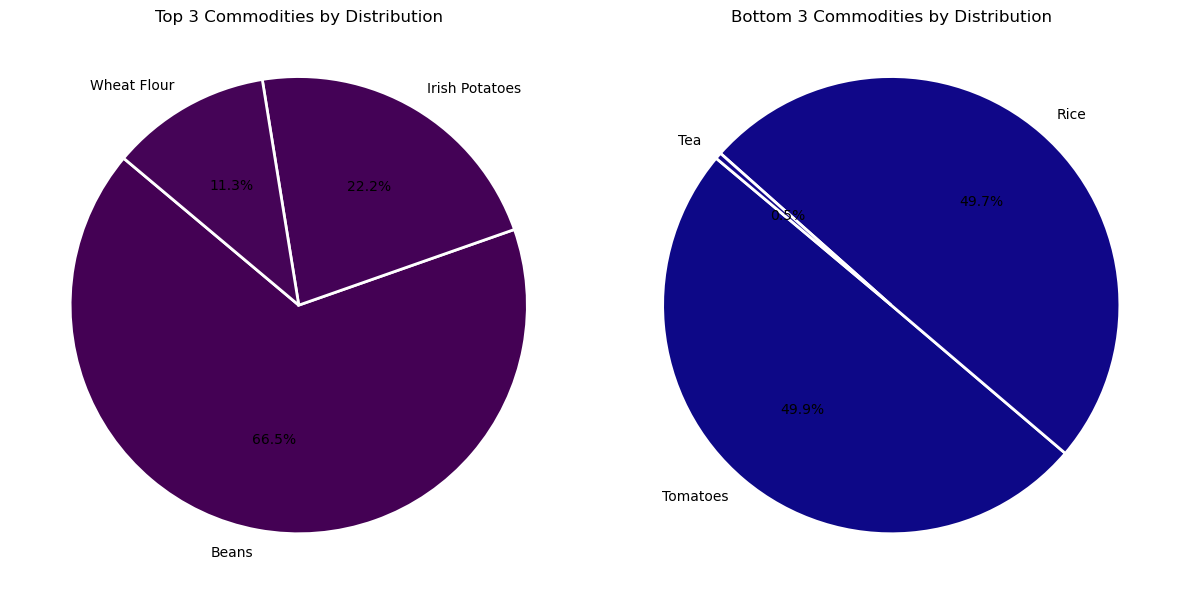

In [25]:

# Count occurrences of commodities
commodity_counts = df_clean["Commodity"].value_counts()

# Top 3 and Bottom 3
top3 = commodity_counts.head(3)
bottom3 = commodity_counts.tail(3)

# Create subplots for side-by-side charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
wedge_props = {'edgecolor': 'white', 'linewidth': 2}
# --- Top 3 Pie Chart ---
axes[0].pie(
    top3,
    labels=top3.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.viridis(range(len(top3))),
    wedgeprops=wedge_props
)
axes[0].set_title("Top 3 Commodities by Distribution")
axes[0].axis('equal')  # Keep circle shape

# --- Bottom 3 Pie Chart ---
axes[1].pie(
    bottom3,
    labels=bottom3.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.plasma(range(len(bottom3))),
    wedgeprops=wedge_props
)
axes[1].set_title("Bottom 3 Commodities by Distribution")
axes[1].axis('equal')

plt.tight_layout()
plt.show()

### Top & Bottom 3 Commodities by Distribution

**Observation**
- **Top 3 most available**  
  - Wheat Flour – 66.5 %
  - Irish Potatoes – 49.9 % 
  - Rice – 49.7 %

- **Bottom 3 least available**  
  - Beans – 22.2 %
  - Tomatoes – 11.3 %  
  - Tea – lowest with 0.5 %

**Insights**
- Wheat Flour is almost everywhere easy to find in any county.  
- Irish Potatoes and Rice also reach half the markets making them common staples.  
- Beans and Tomatoes are harder to find so shortages can push prices up quickly.  
- Tea is the rarest hence small supply gaps may cause sharp price spikes.